<a href="https://colab.research.google.com/github/Silviadas21/Sentiment-Analysis/blob/main/Mtech1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import numpy as np
#import pandas as pd
#import nltk

#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from sklearn.model_selection import train_test_split

#import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')


import re
import string
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# from scikitlearn.model_selection import train_test_split
# from scikitlearn.preprocessing import LabelEncoder
# from scikitlearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , LSTM , Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# import Dataset
data = pd.read_csv(r"/content/Updated_dataset_project.csv")
data.head()

,is_sarcastic,headline,article_link,tag,confidence
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,Positive,9.72
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,Negative,7.85
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,Positive,6.78
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,Negative,6.89
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,Neutral,3.94


In [ ]:
data.shape

(1199, 5)

In [ ]:
# Check null values
data.isna().sum().to_frame(name='# of missing values')

,# of missing values
is_sarcastic,0
headline,0
article_link,0
tag,0
confidence,0


In [ ]:
# Option 1: Drop all columns with any null values
data = data.dropna(axis=1)  # 'axis=1' specifies dropping columns

In [ ]:
print(data.shape)

(1199, 5)


In [ ]:
sentiment_map = {'Positive':2, 'Negative': 0, 'Neutral': 1}
data['tag_map'] = data['tag'].map(sentiment_map)

In [ ]:
data.head(5)

,is_sarcastic,headline,article_link,tag,confidence,tag_map
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,Positive,9.72,2
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,Negative,7.85,0
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,Positive,6.78,2
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,Negative,6.89,0
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,Neutral,3.94,1


In [ ]:
data.describe()

,is_sarcastic,confidence,tag_map
count,1199.000000,1199.000000,1199.000000
mean,0.465388,6.718007,1.040867
std,0.499009,1.604056,0.993719
min,0.000000,3.380000,0.000000
25%,0.000000,5.440000,0.000000
50%,0.000000,6.680000,2.000000
75%,1.000000,7.995000,2.000000
max,1.000000,9.900000,2.000000


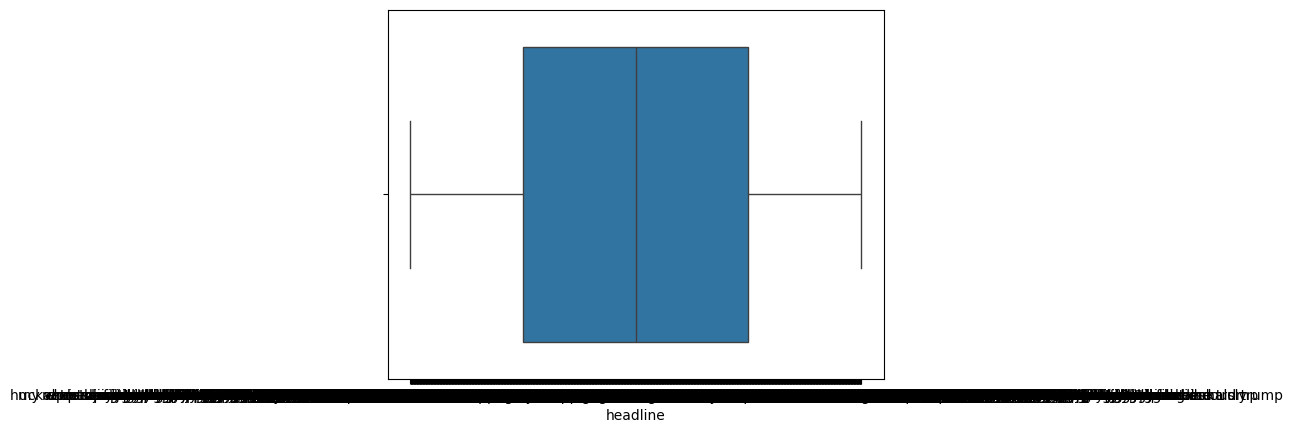

In [ ]:
sns.boxplot(x = "headline",data=data)
plt.show()

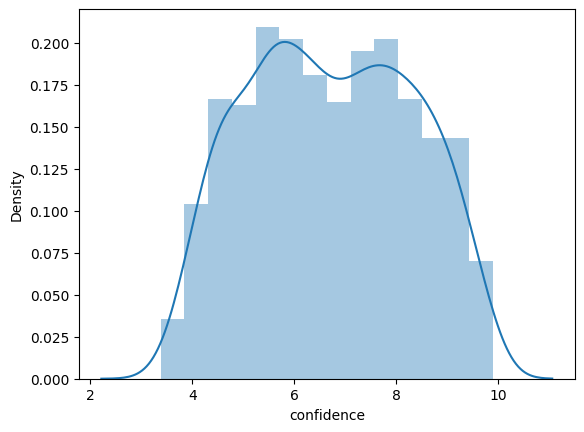

In [ ]:
sns.distplot(data['confidence'])
plt.show()

In [ ]:
columns_to_drop = ['is_sarcastic', 'article_link']
data = data.drop(columns_to_drop, axis=1)

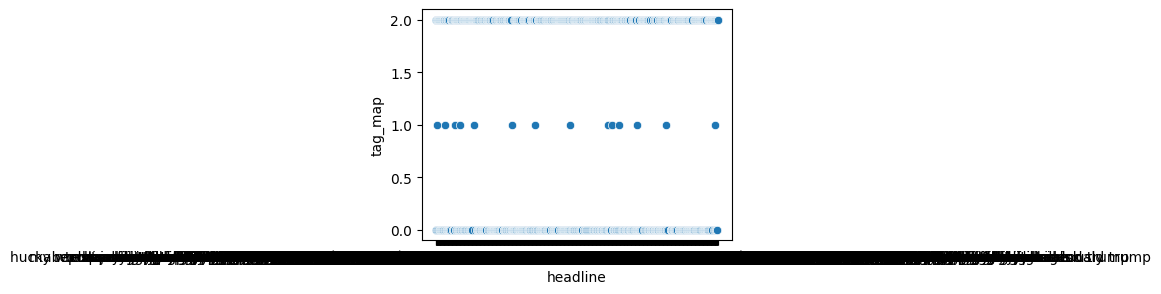

In [ ]:
plt.figure(figsize=(4, 3))
#sns.countplot(x = "tag",data=data)
#plt.show()
sns.scatterplot(x = "headline",y = "tag_map",data=data)
plt.show()

In [ ]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

#
final_stopwords.add("one")
print(final_stopwords)

{'which', 'most', 'yourselves', 'up', 'one', 'under', 'my', 'if', 'an', 'those', "you've", 'then', 'same', 'am', 'ain', 'other', 'doesn', 'were', 'he', 'ours', "it's", 'who', 'just', 'haven', 'll', 'such', 'shouldn', 'than', 'with', 'all', 'them', 'about', 'too', 'm', 'she', 'be', 'won', 'do', 'for', 'into', 'there', 'or', 'his', 'ourselves', 'some', 'your', 'didn', 'during', 'more', 'd', 'ma', "you'll", 'while', 'aren', 'their', 'below', 'him', 'to', 'how', 'being', "she's", 'itself', 'needn', 'but', 'its', 'having', 'mustn', 's', 'in', 'from', 'myself', 'does', 'on', 'had', 'after', 'between', 'can', 'each', 'against', 'shan', 'it', 'y', 'by', 'isn', 'further', 'over', 'only', 'herself', 'as', 'a', 'own', 'so', 'again', 'i', 'this', 'yourself', 'the', 'me', 'why', 'doing', 'through', 'few', 're', 'any', 'whom', 'wasn', 'they', 'here', 'off', 'what', "you're", 'because', 'that', 'where', 'out', 'yours', 'we', "that'll", 'did', 'when', 'her', 'has', 'theirs', 't', 'of', 'been', 'above'

In [ ]:
def get_sequences(texts):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)

    sequences = tokenizer.texts_to_sequences(texts)
    print("Vocab length:", len(tokenizer.word_index) + 1)

    max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
    print("Maximum sequence length:", max_seq_length)

    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    #print("Sequences shape:", sequences.shape)
    vectorizer = TfidfVectorizer(max_features=len(tokenizer.word_index) + 1)  # Consider adjusting max_features
    vectorizer.fit(texts)
    tfidf_features = vectorizer.fit_transform(sequences)

    return sequences,tfidf_features

In [ ]:
#print(get_sequences(data['headline'].iloc[0]))

In [ ]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

In [ ]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)

    # remove digits
    review = review.translate(remove_digits)

    # lower case all letters
    review = review.lower()

    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()

    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]

    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])

    return review

In [ ]:
# word clouds

#def generate_wcloud(text):
    #stopwords = set(STOPWORDS)

    #wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    #wordcloud.generate(text)

    #plt.figure(figsize=(15,7))
    #plt.axis('off')
    #plt.imshow(wordcloud, interpolation='bilinear')
   # return plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   headline    1199 non-null   object 
 1   tag         1199 non-null   object 
 2   confidence  1199 non-null   float64
 3   tag_map     1199 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 37.6+ KB


In [ ]:
# X = data.headline
# y = data.tag

# X_train, X_test, y_train, y_test = train_test_split(

#     X, y, test_size=0.20, random_state=1, stratify=y)

In [ ]:
#X_train.shape, X_test.shape

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(max_features=10000)
# tfidf_vectorizer.fit(X_train)

# # transform
# tfidf_X_train = tfidf_vectorizer.transform(X_train)
# tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [ ]:
# labelEncoder = LabelEncoder()

# y_train = labelEncoder.fit_transform(y_train)
# y_test = labelEncoder.transform(y_test)

# labels = labelEncoder.classes_.tolist()
# print(labels)

In [ ]:
x = data['headline']
y = data['tag_map']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

TF-IDF feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
X_train[0]

<1x4017 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='poly',degree=3, C=1)
sv.fit(X_train, y_train)



SVC(C=1, kernel='poly')

In [ ]:
sv.score(X_test, y_test)*100

54.166666666666664

Checking the default parameters in an SVC and trying for hyperparamer


In [ ]:
sv.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(estimator=sv, param_grid={
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'C': [1, 10, 100]
})

In [ ]:
gd.fit(X_train, y_train)

GridSearchCV(estimator=SVC(C=1, kernel='poly'),
             param_grid={'C': [1, 10, 100], 'degree': [2, 3, 4, 5, 6],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [ ]:
# access the best model and results:
best_model = gd.best_estimator_
print(gd.cv_results_)  # This will print detailed results

# Use the best_model for prediction on new data
#predictions = best_model.predict(new_data)

{'mean_fit_time': array([0.27007451, 0.23285937, 0.15752492, 0.2419858 , 0.17852874,
       0.12468791, 0.23404479, 0.18039103, 0.12442298, 0.24294829,
       0.17926955, 0.12419648, 0.2761888 , 0.22670312, 0.16275086,
       0.23651195, 0.17567301, 0.12863364, 0.23907104, 0.18243976,
       0.13033471, 0.24940462, 0.17776194, 0.1292963 , 0.30627851,
       0.22695684, 0.17318792, 0.2734005 , 0.17879362, 0.13245277,
       0.32431383, 0.176682  , 0.12788711, 0.23821955, 0.17754889,
       0.14645772, 0.30086851, 0.22971201, 0.15471015, 0.25712981,
       0.17595601, 0.12856307, 0.26443691, 0.17733293, 0.1311893 ]), 'std_fit_time': array([0.02712677, 0.00613602, 0.0108225 , 0.02506612, 0.00353293,
       0.00143456, 0.00490544, 0.00286569, 0.00384256, 0.00207701,
       0.00359691, 0.00290857, 0.02263631, 0.00400256, 0.01292133,
       0.00776914, 0.00354383, 0.00501394, 0.00769544, 0.00476663,
       0.0065513 , 0.00729351, 0.00192193, 0.00458075, 0.01939917,
       0.00433179, 0.01063

In [ ]:
#Calculating the accuracy of tuned model
best_model_predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_model_predictions)*100
print("Accuracy for testdata:", accuracy)

best_model_predictions = best_model.predict(X_train)
accuracy = accuracy_score(y_train, best_model_predictions)*100
print("Accuracy for traindata:", accuracy)



Accuracy for testdata: 66.25
Accuracy for traindata: 100.0


In [ ]:
#Classification report for the tuned model
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = best_model.predict(X_test)

# Now use the predictions in the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       112
           1       0.00      0.00      0.00         3
           2       0.65      0.79      0.71       125

    accuracy                           0.66       240
   macro avg       0.45      0.44      0.44       240
weighted avg       0.66      0.66      0.65       240



confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[60  0 52]
 [ 1  0  2]
 [26  0 99]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_train, y_train)*100 , mnb.score(X_test, y_test)*100

(97.5609756097561, 56.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)*100 , lr.score(X_test, y_test)*100

(98.84823848238482, 69.16666666666667)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)*100 , dt.score(X_test, y_test)*100

(100.0, 56.666666666666664)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)*100 , rf.score(X_test, y_test)*100

(100.0, 62.083333333333336)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
li = [('mnb',MultinomialNB(alpha=1.0)),('svm',SVC(kernel='linear', C=1.0)),('lr',LogisticRegression(solver='lbfgs', max_iter=100)),('dt',DecisionTreeClassifier(max_depth=100)),('rf',RandomForestClassifier(n_estimators=100))]

In [ ]:
#vc.get_params()

In [ ]:
vc = VotingClassifier(li,weights = [10,20,5,30,7])
vc.fit(X_train, y_train)


VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('svm', SVC(kernel='linear')),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=100)),
                             ('rf', RandomForestClassifier())],
                 weights=[10, 20, 5, 30, 7])

In [ ]:
vc.score(X_train, y_train)*100 , vc.score(X_test, y_test)*100

(99.93224932249322, 64.58333333333334)

Applying K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
sv = SVC()  # Replace with your models
mnb = MultinomialNB()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(sv, X_train, y_train, cv=cv)
scores2 = cross_val_score(mnb, X_train, y_train, cv=cv)
scores3 = cross_val_score(lr, X_train, y_train, cv=cv)
scores4 = cross_val_score(dt, X_train, y_train, cv=cv)
scores5 = cross_val_score(rf, X_train, y_train, cv=cv)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

print("Cross-validation scores:", scores2)
print("Mean score:", scores2.mean())

print("Cross-validation scores:", scores3)
print("Mean score:", scores3.mean())

print("Cross-validation scores:", scores4)
print("Mean score:", scores4.mean())

print("Cross-validation scores:", scores5)
print("Mean score:", scores5.mean())


Cross-validation scores: [0.74324324 0.76949153 0.74915254 0.76949153 0.82711864]
Mean score: 0.7716994961062758
Cross-validation scores: [0.68243243 0.75254237 0.71525424 0.69152542 0.74576271]
Mean score: 0.7175034356390289
Cross-validation scores: [0.72972973 0.79322034 0.73220339 0.76949153 0.80677966]
Mean score: 0.7662849289967935
Cross-validation scores: [0.7027027  0.73559322 0.71186441 0.6779661  0.76949153]
Mean score: 0.7195235913879982
Cross-validation scores: [0.72635135 0.75254237 0.71864407 0.75254237 0.77966102]
Mean score: 0.7459482363719652


Again hyperparameter tuning using gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# Example hyperparameter grids (adjust for your models)
# param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
# param_grid_mnb = {'alpha': [0.001, 0.1, 1]}
# param_grid_lr = {'C': [0.1, 1, 10]}
# param_grid_dt = {'max_depth': [3, 5, 8]}
# param_grid_rf = {'n_estimators': [100, 200, 300]}

param_grid_svc = {'C': [0.4, 2, 10], 'kernel': ['linear', 'rbf']}
param_grid_mnb = {'alpha': [0.001, 0.1, 5, 10]}
param_grid_lr = { 'C': [1, 2, 3]}
param_grid_dt = {'max_depth': [3, 7, 9]}
param_grid_rf = {'n_estimators': [100, 200, 400] }

# Create GridSearchCV objects
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=cv, scoring='accuracy')
grid_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=cv, scoring='accuracy')
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=cv, scoring='accuracy')
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=cv, scoring='accuracy')
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=cv, scoring='accuracy')

# Fit models for hyperparameter tuning
grid_svc.fit(X_train, y_train)
grid_mnb.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# Access best models and scores
best_svc = grid_svc.best_estimator_
best_mnb = grid_mnb.best_estimator_
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

best_score_svc = grid_svc.best_score_
best_score_mnb = grid_mnb.best_score_
best_score_lr = grid_lr.best_score_
best_score_dt = grid_dt.best_score_
best_score_rf = grid_rf.best_score_

print("Best SVC model:", best_svc)
print("Best SVC score:", best_score_svc)
print("Best Multinomial Naive Bayes model:", best_mnb)
print("Best Multinomial Naive Bayes score:", best_score_mnb)
print("Best Logistic Regression model:", best_lr)
print("Best Logistic Regression score:", best_score_lr)
print("Best Decision Tree model:", best_dt)
print("Best Decision Tree score:", best_score_dt)
print("Best Random Forest model:", best_rf)
print("Best Random Forest score:", best_score_rf)


Best SVC model: SVC(C=2)
Best SVC score: 0.7764498396701787
Best Multinomial Naive Bayes model: MultinomialNB(alpha=0.001)
Best Multinomial Naive Bayes score: 0.746635364177737
Best Logistic Regression model: LogisticRegression(C=1)
Best Logistic Regression score: 0.7662849289967935
Best Decision Tree model: DecisionTreeClassifier(max_depth=9)
Best Decision Tree score: 0.710038937242327
Best Random Forest model: RandomForestClassifier()
Best Random Forest score: 0.7493472285845166


applying bagging technique

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [ ]:
bg = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20, random_state=42)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20,
                  random_state=42)

In [ ]:
bg.score(X_train, y_train)*100 , bg.score(X_test, y_test)*100

(99.25474254742548, 63.74999999999999)

In [ ]:
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
bg.score(X_train, y_train)*100 , bg.score(X_test, y_test)*100

(98.84823848238482, 57.49999999999999)

In [ ]:
bg = BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=42)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=42)

In [ ]:
bg.score(X_train, y_train)*100 , bg.score(X_test, y_test)*100

(99.52574525745257, 67.91666666666667)

In [ ]:
bg = BaggingClassifier(base_estimator=MultinomialNB(), n_estimators=45, random_state=42)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=MultinomialNB(), n_estimators=45,
                  random_state=42)

In [ ]:
bg.score(X_train, y_train)*100 , bg.score(X_test, y_test)*100

(96.81571815718158, 57.08333333333333)

In [ ]:
data["tag_map"].value_counts()

tag_map
2    617
0    568
1     14
Name: count, dtype: int64

In [ ]:
#data["headline"].value_counts()

In [ ]:
#len(data)

# New section